Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


Data Collection & Processing

In [ ]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('Titanic_final.csv')

In [ ]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# number of rows and Columns
titanic_data.shape


(1309, 12)

In [ ]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

Handling the Missing values

In [ ]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [ ]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [ ]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.270043
std,378.020061,0.484918,0.837836,12.883193,1.041658,0.865560,51.747063
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    815
1    494
Name: Survived, dtype: int64

DATA VISUALISATION

In [ ]:
sns.set()

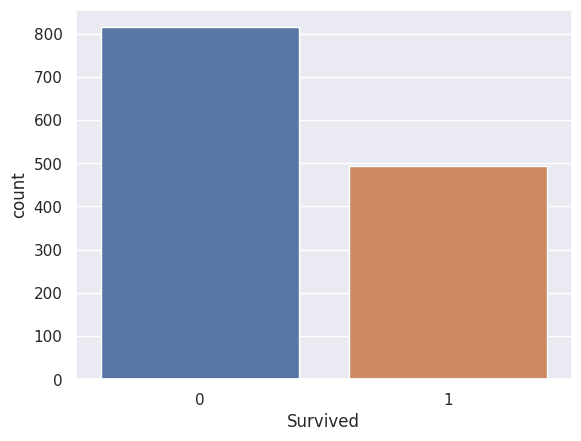

In [ ]:
# making a count plot for "Survived" column
sns.countplot(x= 'Survived', data= titanic_data)
plt.show()

In [ ]:
titanic_data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

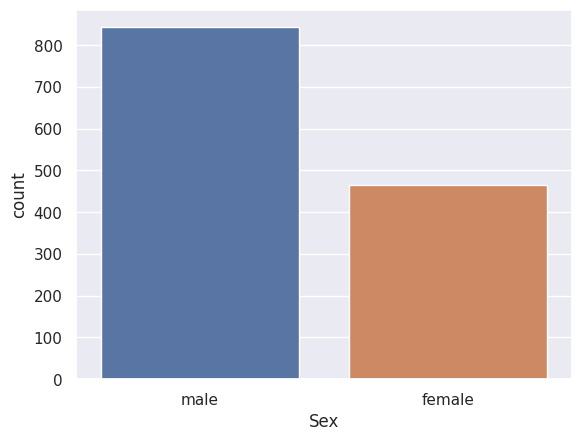

In [ ]:
# making a count plot for "Sex" column
sns.countplot(x = 'Sex', data = titanic_data)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

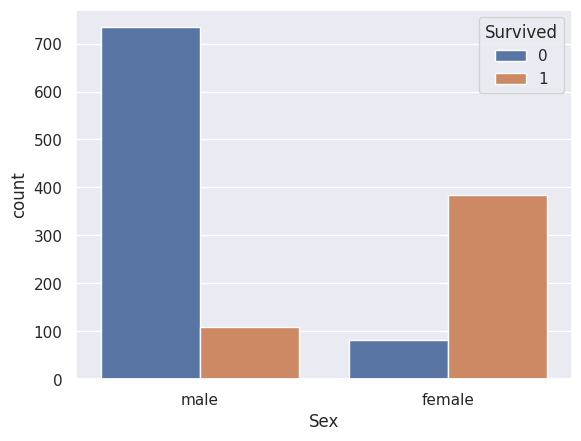

In [ ]:
# number of survivors Gender wise
sns.countplot(x= 'Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

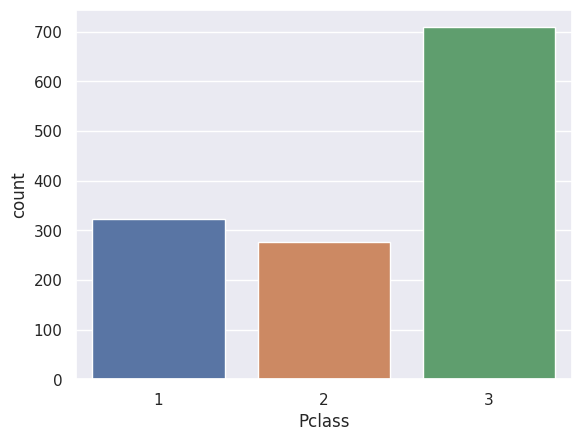

In [ ]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

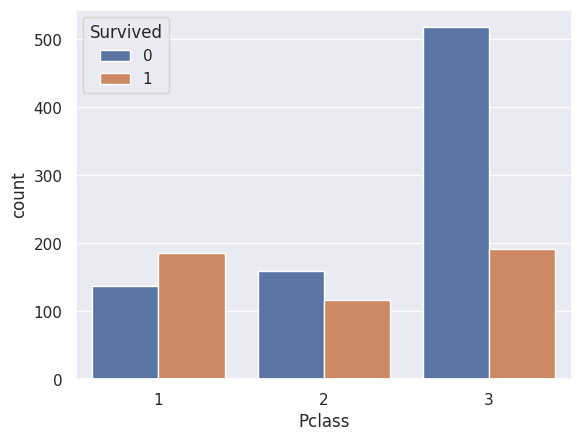

In [ ]:
#number of Survivors Class wise
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

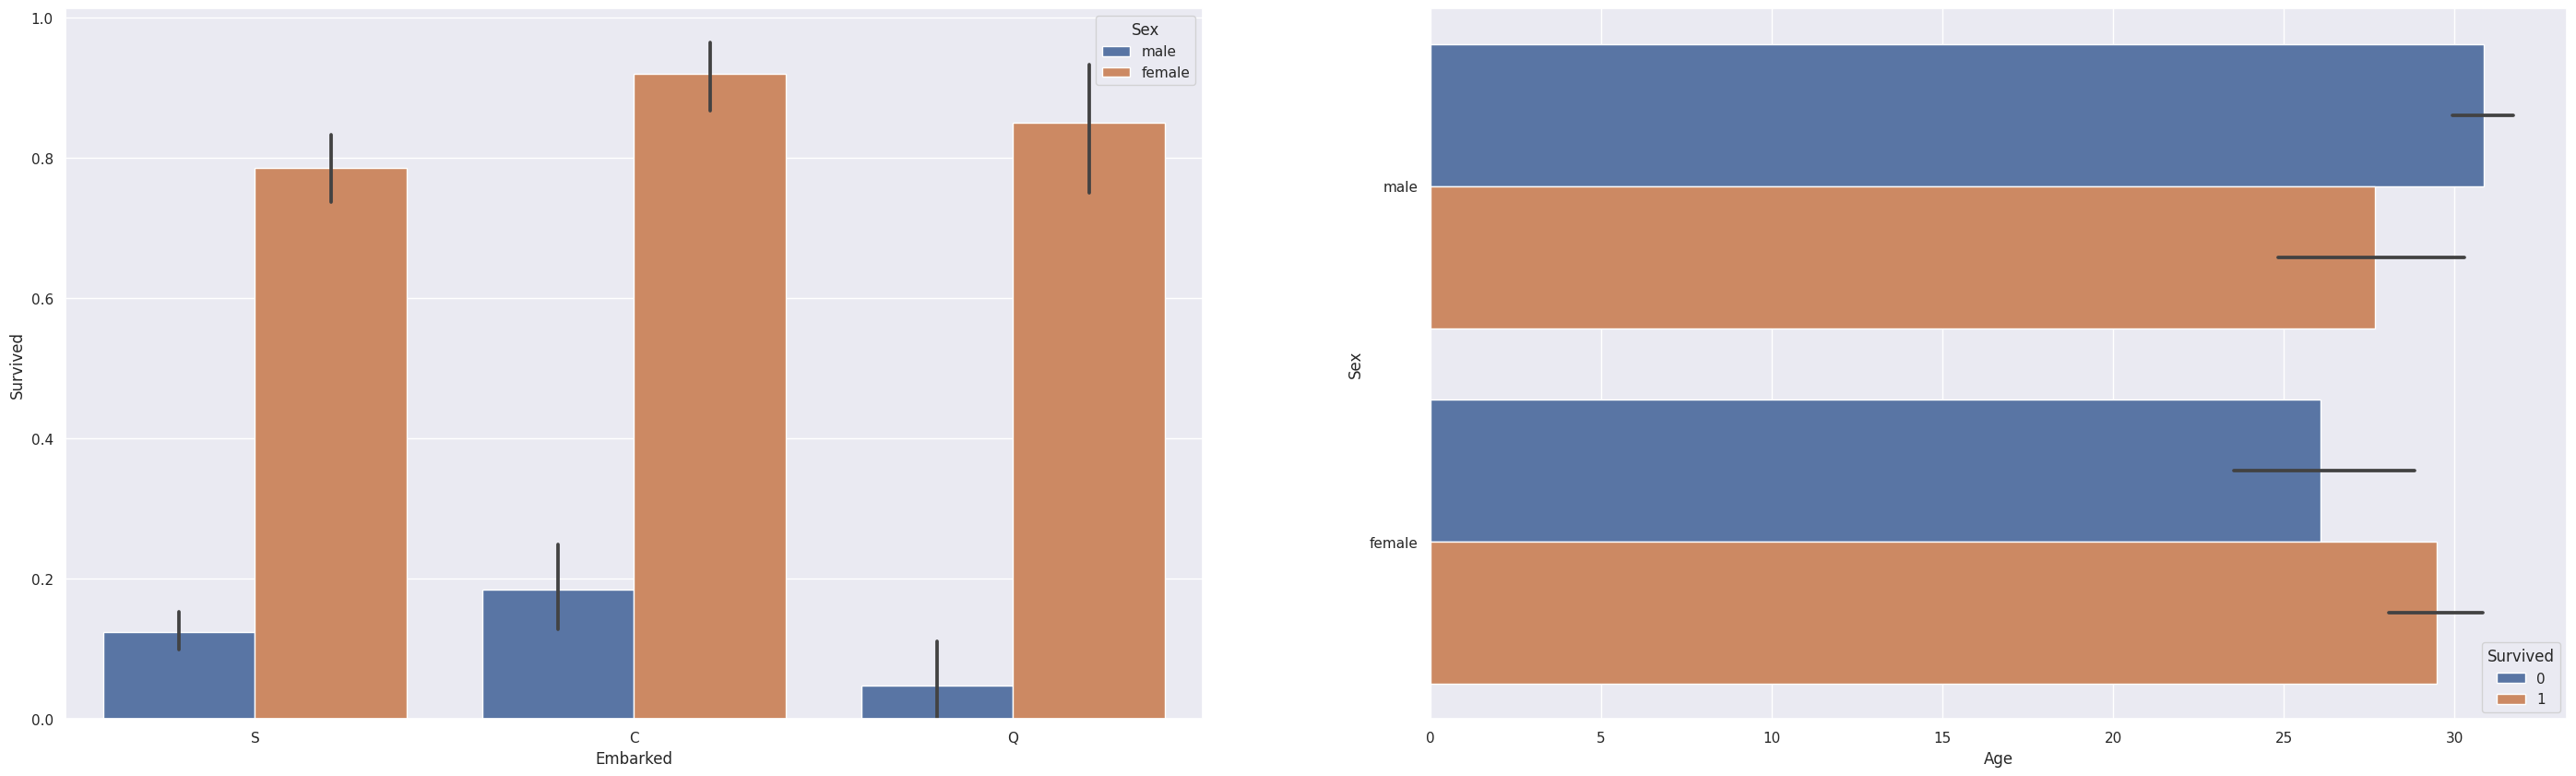

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(35,10))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_data, ax = axis1);
sns.barplot(x="Age", y="Sex", hue="Survived", data=titanic_data, ax = axis2);

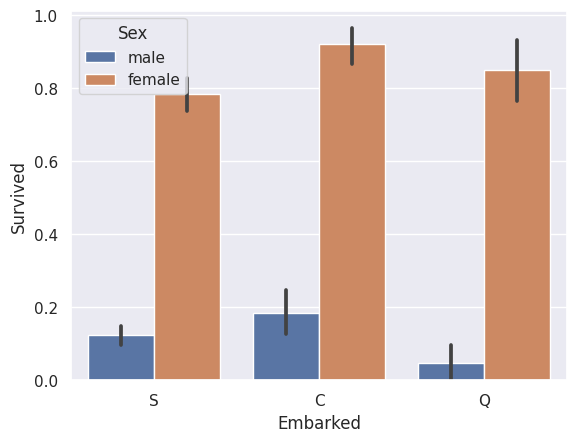

In [ ]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_data);
sns.barplot(x="Age", y="Survived", hue="Sex", data=titanic_data, ax = axis2);

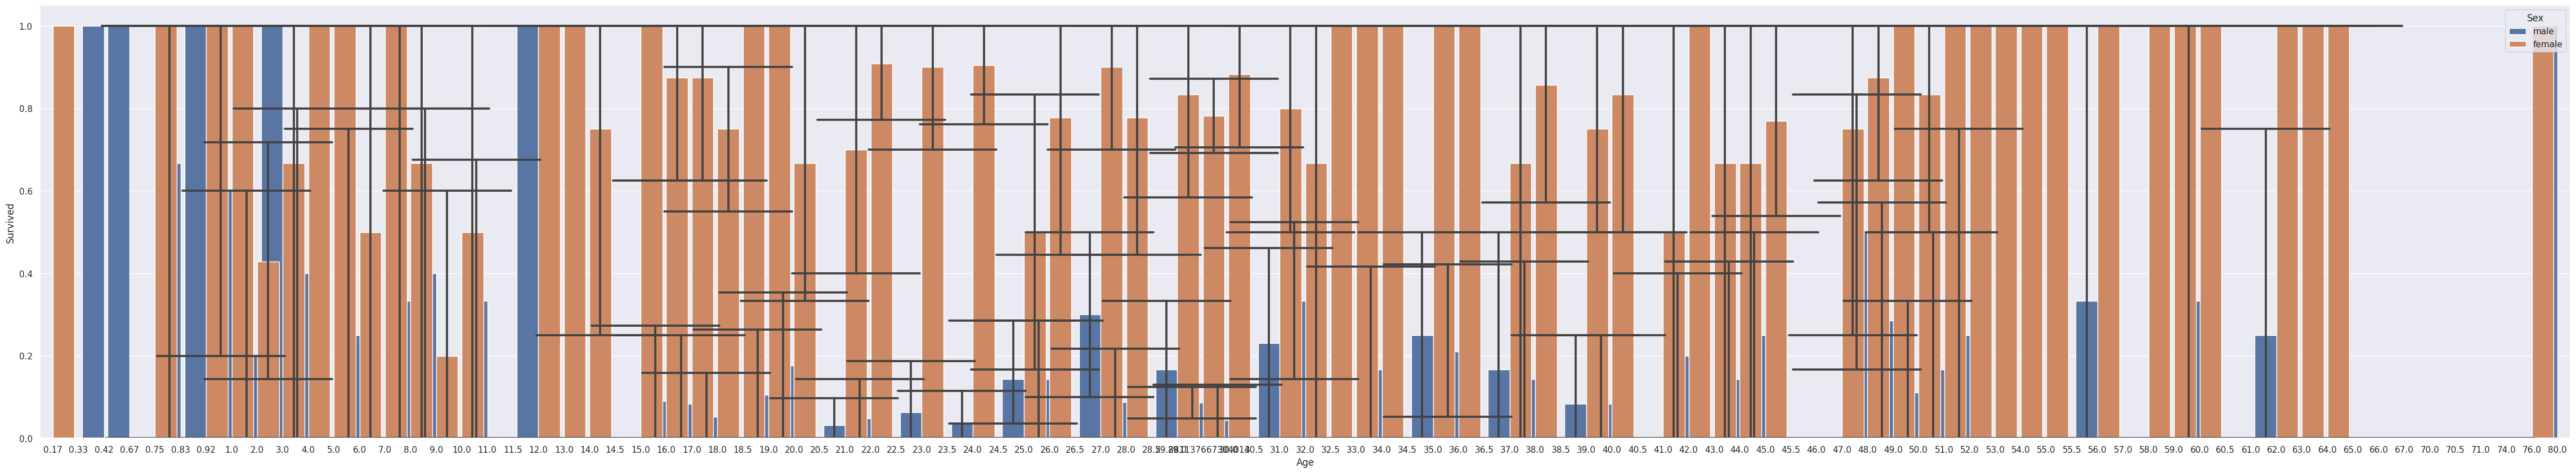

In [ ]:
plt.figure(figsize=(58, 10)) # Create a new figure with a size of 12x8 inches
#data.columns.sum()
sns.barplot(x="Age", y="Survived", hue="Sex", data=titanic_data, width=1.7,capsize = 5) # Plot the barplot with the specified size
plt.show()


Observations for Age graph:

*   0 or blue represent women; 1 or orange represent men. Gender and age seem to have a stronger influece of the survival rate.
*   We start to find where most survivors are: older women (48 to 64 year old), and younger passengers.


*   What is statistically interesting is that only young boys (Age Category = 0) have high survival rates, unlike other age groups for men.
  


Text(0.5, 1.0, 'Pclass vs Age Survival Comparison')

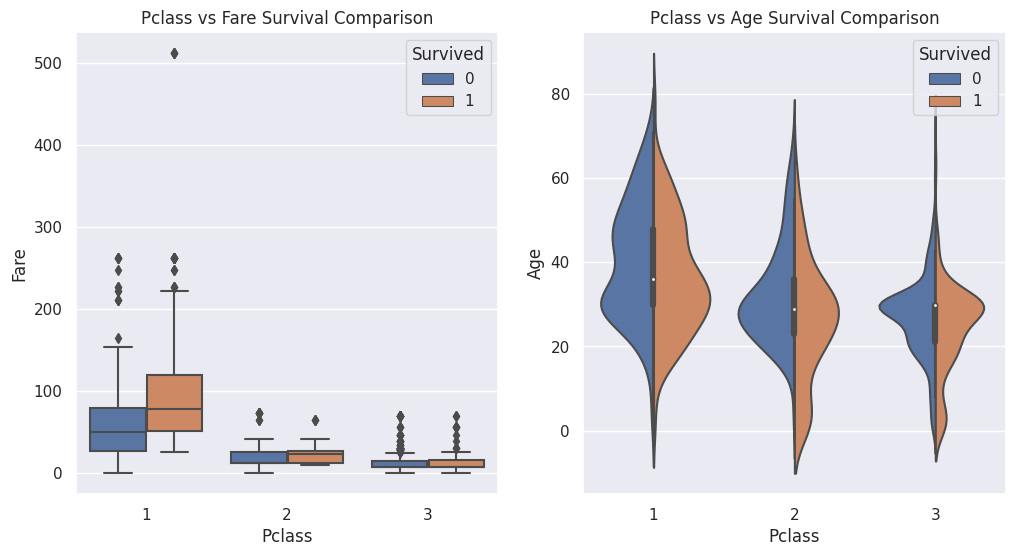

In [ ]:
#graph distribution of qualitative data: Pclass
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = titanic_data, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = titanic_data, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

Heatmap



In [ ]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [ ]:

titanic_corr = titanic_data[cols].corr()

<ipython-input-27-2a58e3fa4b11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr = titanic_data[cols].corr()


In [ ]:
titanic_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.264710,-0.048483,0.002370,0.108919,0.233914
Pclass,-0.264710,1.000000,-0.366371,0.060832,0.018322,-0.558803
Age,-0.048483,-0.366371,1.000000,-0.190747,-0.130872,0.170325
SibSp,0.002370,0.060832,-0.190747,1.000000,0.373587,0.160434
Parch,0.108919,0.018322,-0.130872,0.373587,1.000000,0.221706
Fare,0.233914,-0.558803,0.170325,0.160434,0.221706,1.000000


Text(0.5, 1.0, 'cbar=True')

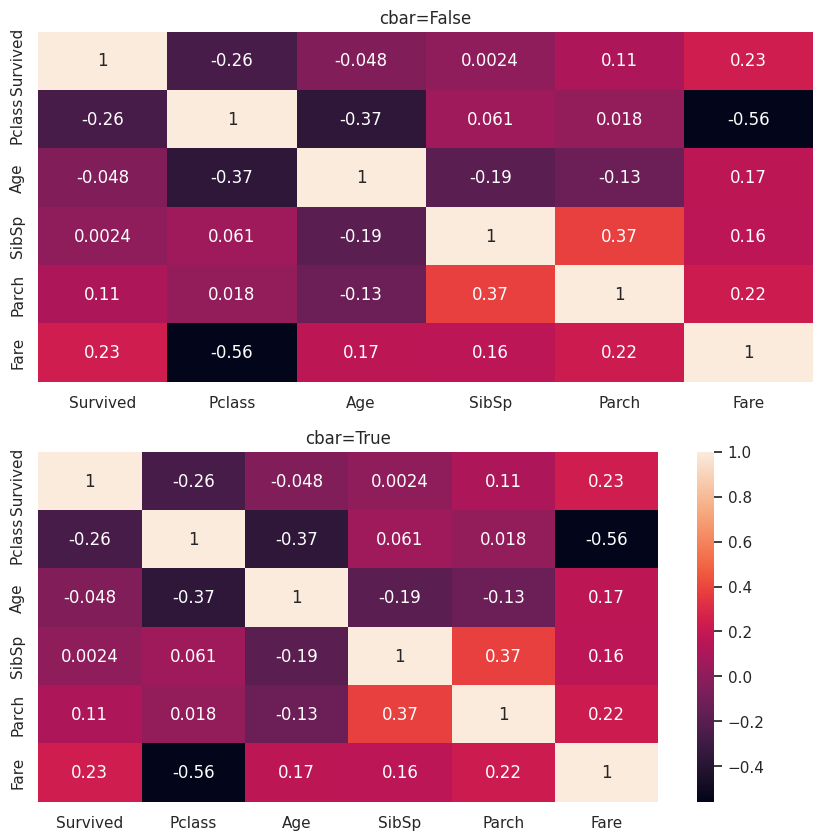

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(titanic_corr,annot=True,ax=ax1,cbar=False)
sns.heatmap(titanic_corr,annot=True,ax=ax2,cbar=True)
ax1.set_title("cbar=False")
ax2.set_title("cbar=True")

Encoding the Categorical Columns

In [ ]:
titanic_data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.881138,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


Separating features & Target

In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

      Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0          3    0  22.000000      1      0    7.2500         0
1          1    1  38.000000      1      0   71.2833         1
2          3    1  26.000000      0      0    7.9250         0
3          1    1  35.000000      1      0   53.1000         0
4          3    0  35.000000      0      0    8.0500         0
...      ...  ...        ...    ...    ...       ...       ...
1304       3    0  29.881138      0      0    8.0500         0
1305       1    1  39.000000      0      0  108.9000         1
1306       3    0  38.500000      0      0    7.2500         0
1307       3    0  29.881138      0      0    8.0500         0
1308       3    0  29.881138      1      1   22.3583         1

[1309 rows x 7 columns]


In [ ]:
print(Y)

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64


Splitting the data into training data & Test data

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, x_test.shape)

(1309, 7) (1047, 7) (262, 7)


Model Training

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred1 = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


86.64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pred1))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred1), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       165
           1       0.84      0.78      0.81        97

    accuracy                           0.87       262
   macro avg       0.86      0.85      0.85       262
weighted avg       0.87      0.87      0.87       262

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 151                   14
Actual: SURVIVED             21                   76


Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)


# Preparing data for Submission 2
test_Survived = pd.Series(random_forest_predictions, name="Survived")


acc_random_forest

81.68

In [ ]:
print(classification_report(y_test, random_forest_predictions))
cm = pd.DataFrame(confusion_matrix(y_test, random_forest_predictions), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       165
           1       0.76      0.73      0.75        97

    accuracy                           0.82       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.82      0.82      0.82       262

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 143                   22
Actual: SURVIVED             26                   71


Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred7 = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

76.72

In [ ]:
print(classification_report(y_test, Y_pred7))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred7), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       165
           1       0.71      0.63      0.67        97

    accuracy                           0.77       262
   macro avg       0.75      0.74      0.74       262
weighted avg       0.76      0.77      0.76       262

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 140                   25
Actual: SURVIVED             36                   61


Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred3 = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
acc_gaussian

85.11

In [ ]:
print(classification_report(y_test, Y_pred3))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred3), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       165
           1       0.82      0.77      0.79        97

    accuracy                           0.85       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 148                   17
Actual: SURVIVED             22                   75


Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc

63.74

In [ ]:
print(classification_report(y_test, Y_pred2))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred2), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       165
           1       0.53      0.22      0.31        97

    accuracy                           0.64       262
   macro avg       0.59      0.55      0.53       262
weighted avg       0.61      0.64      0.59       262

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 146                   19
Actual: SURVIVED             76                   21


Linear Support Vector Clssification


In [ ]:
from sklearn.svm import LinearSVC
from sklearn import svm

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred5 = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80.15

In [ ]:

print(classification_report(y_test, Y_pred5))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred5), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       165
           1       0.69      0.86      0.76        97

    accuracy                           0.80       262
   macro avg       0.79      0.81      0.80       262
weighted avg       0.82      0.80      0.80       262

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 127                   38
Actual: SURVIVED             14                   83


*K*-Nearest Neighbors Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
                           weights='uniform')


knn.fit(X_train, Y_train)
knn_predictions = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)

# Preparing data for Submission 1
test_Survived = pd.Series(knn_predictions, name="Survived")
# Submission1 = pd.concat([PassengerId,test_Survived],axis=1)
acc_knn


63.36

In [ ]:
print(classification_report(y_test, knn_predictions))
cm = pd.DataFrame(confusion_matrix(y_test, knn_predictions), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       165
           1       0.51      0.30      0.38        97

    accuracy                           0.63       262
   macro avg       0.59      0.56      0.56       262
weighted avg       0.61      0.63      0.61       262

                  Predicted: NO  Predicted: SURVIVED
Actual: NOT                 137                   28
Actual: SURVIVED             68                   29


Comparision study of all the algorithms used

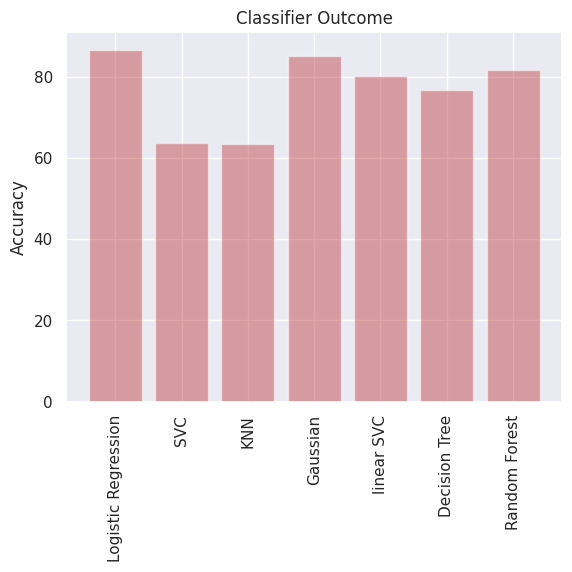

In [ ]:

objects = ('Logistic Regression', 'SVC', 'KNN', 'Gaussian',  'linear SVC',  'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))
accuracies1 = [acc_log, acc_svc, acc_knn, acc_gaussian, acc_linear_svc, acc_decision_tree, acc_random_forest]

plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()